## Perform exploratory data analysis (EDA) and calculate key financial metrics like daily returns, cumulative returns, volatility, and Sharpe ratio

### Load the Cleaned Data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv('stock_data.csv')  

In [12]:
data.head()

,Date,Ticker,Close,High,Low,Open,Volume
0,1/2/2018,AAPL,40.524342,40.533754,39.818588,40.030317,102223600
1,1/2/2018,AMZN,59.450500,59.500000,58.525501,58.599998,53890000
2,1/2/2018,GOOGL,53.466679,53.604679,52.460826,52.460826,31766000
3,1/2/2018,MSFT,79.633522,79.967066,79.216595,79.800294,22483800
4,1/3/2018,AAPL,40.517284,41.063069,40.453769,40.587860,118071600


### Check the data types and look for missing values:

In [14]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036 entries, 0 to 6035
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6036 non-null   object 
 1   Ticker  6036 non-null   object 
 2   Close   6036 non-null   float64
 3   High    6036 non-null   float64
 4   Low     6036 non-null   float64
 5   Open    6036 non-null   float64
 6   Volume  6036 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 330.2+ KB


Date      0
Ticker    0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

### Correcting Date format in datetime:

In [16]:
data['Date'] = pd.to_datetime(data['Date'])

In [17]:
data.describe()


,Date,Close,High,Low,Open,Volume
count,6036,6036.000000,6036.000000,6036.000000,6036.000000,6.036000e+03
mean,2020-12-30 14:13:07.276342016,131.686235,133.110316,130.159963,131.642659,6.348632e+07
min,2018-01-02 00:00:00,33.952534,34.795437,33.907164,34.379953,8.989200e+06
25%,2019-07-03 00:00:00,82.513412,83.761267,81.389265,82.519997,2.865062e+07
50%,2020-12-30 00:00:00,119.512089,121.002499,117.982311,119.342573,4.928305e+07
75%,2022-06-30 00:00:00,160.623455,162.488869,158.610752,160.587872,8.342418e+07
max,2023-12-29 00:00:00,379.859497,381.447555,375.353186,380.911585,4.265100e+08
std,NaN,70.343275,70.993957,69.628694,70.327909,4.800675e+07


### Summary Statistics

In [19]:
summary_stats = data.describe()
print(summary_stats)

                                Date        Close         High          Low  \
count                           6036  6036.000000  6036.000000  6036.000000   
mean   2020-12-30 14:13:07.276342016   131.686235   133.110316   130.159963   
min              2018-01-02 00:00:00    33.952534    34.795437    33.907164   
25%              2019-07-03 00:00:00    82.513412    83.761267    81.389265   
50%              2020-12-30 00:00:00   119.512089   121.002499   117.982311   
75%              2022-06-30 00:00:00   160.623455   162.488869   158.610752   
max              2023-12-29 00:00:00   379.859497   381.447555   375.353186   
std                              NaN    70.343275    70.993957    69.628694   

              Open        Volume  
count  6036.000000  6.036000e+03  
mean    131.642659  6.348632e+07  
min      34.379953  8.989200e+06  
25%      82.519997  2.865062e+07  
50%     119.342573  4.928305e+07  
75%     160.587872  8.342418e+07  
max     380.911585  4.265100e+08  
std     

### Grouped Analysis by Ticker

In [20]:
grouped_stats = data.groupby("Ticker").describe()
print("\nSummary Statistics Grouped by Ticker:")
print(grouped_stats)


Summary Statistics Grouped by Ticker:
        Date                                                      \
       count                           mean                  min   
Ticker                                                             
AAPL    1509  2020-12-30 14:13:07.276342016  2018-01-02 00:00:00   
AMZN    1509  2020-12-30 14:13:07.276342016  2018-01-02 00:00:00   
GOOGL   1509  2020-12-30 14:13:07.276342016  2018-01-02 00:00:00   
MSFT    1509  2020-12-30 14:13:07.276342016  2018-01-02 00:00:00   

                                                                       \
                        25%                  50%                  75%   
Ticker                                                                  
AAPL    2019-07-03 00:00:00  2020-12-30 00:00:00  2022-06-30 00:00:00   
AMZN    2019-07-03 00:00:00  2020-12-30 00:00:00  2022-06-30 00:00:00   
GOOGL   2019-07-03 00:00:00  2020-12-30 00:00:00  2022-06-30 00:00:00   
MSFT    2019-07-03 00:00:00  2020-12-30 00:00:

### Closing Price Trend for Each Stock

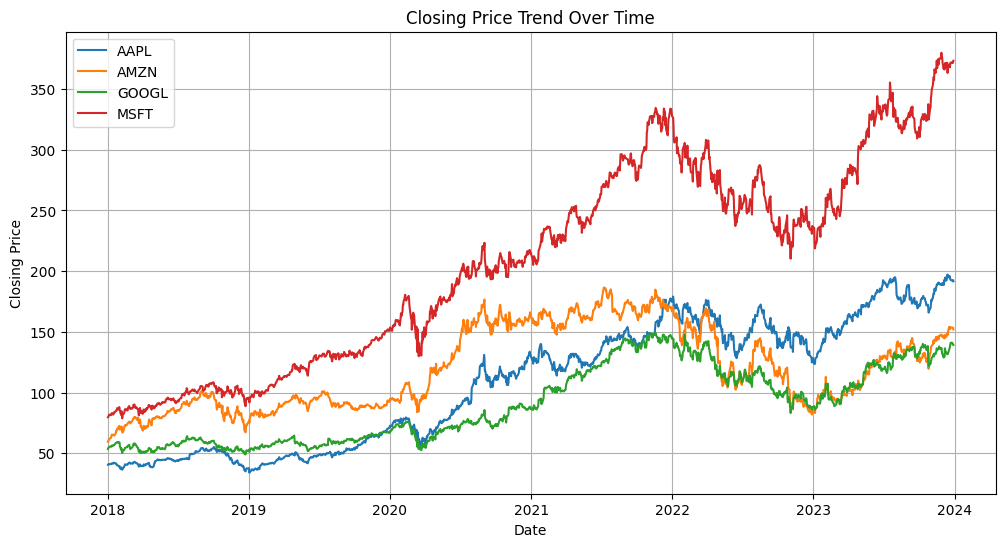

In [21]:
plt.figure(figsize=(12, 6))
for ticker in data["Ticker"].unique():
    stock_data = data[data["Ticker"] == ticker]
    plt.plot(stock_data["Date"], stock_data["Close"], label=ticker)

plt.title("Closing Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid()
plt.show()

- A line plot showing how Close prices have changed over time for each stock.

### Distribution of Closing Prices

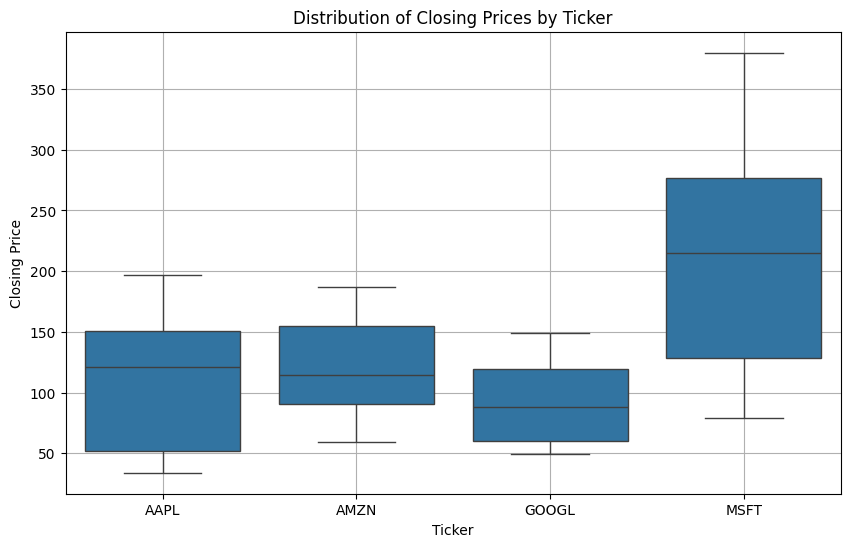

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Ticker", y="Close")
plt.title("Distribution of Closing Prices by Ticker")
plt.xlabel("Ticker")
plt.ylabel("Closing Price")
plt.grid()
plt.show()

- A boxplot showing the spread of Close prices for each stock.

### Volume Analysis Over Time

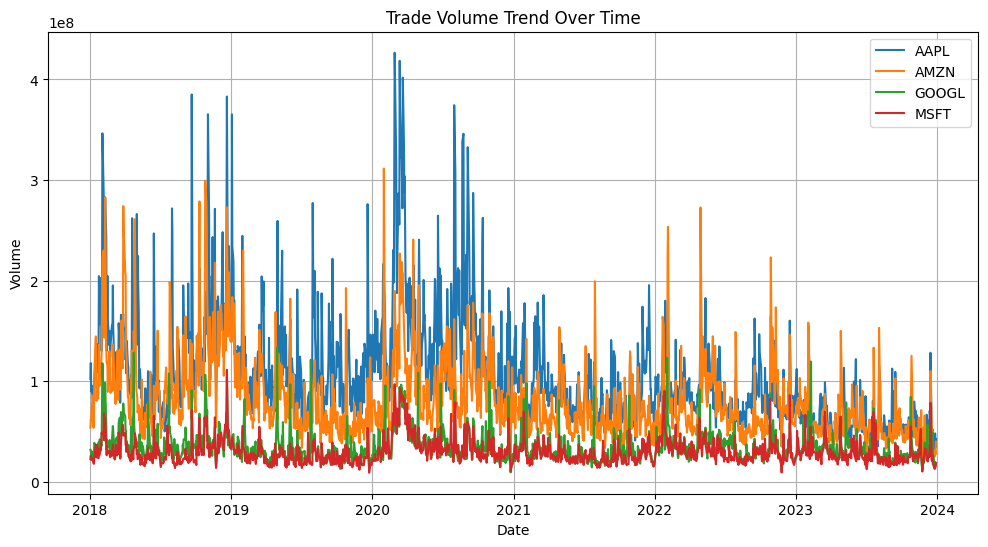

In [23]:
plt.figure(figsize=(12, 6))
for ticker in data["Ticker"].unique():
    stock_data = data[data["Ticker"] == ticker]
    plt.plot(stock_data["Date"], stock_data["Volume"], label=ticker)

plt.title("Trade Volume Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid()
plt.show()

- A line plot showing how trading volume changes over time for each stock.